 1. Problem Definition
 2. Data
 3. Evaluation
 4. Features
 5. Modelling
 6. Experimentation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv("data.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#how many classes are there?
df['target'].value_counts()


target
1    165
0    138
Name: count, dtype: int64

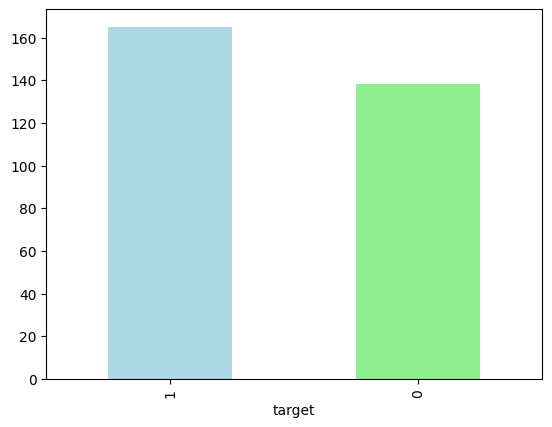

In [4]:
df['target'].value_counts().plot(kind='bar', color=['lightblue', 'lightgreen']);

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#if there is any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#compare two columns
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

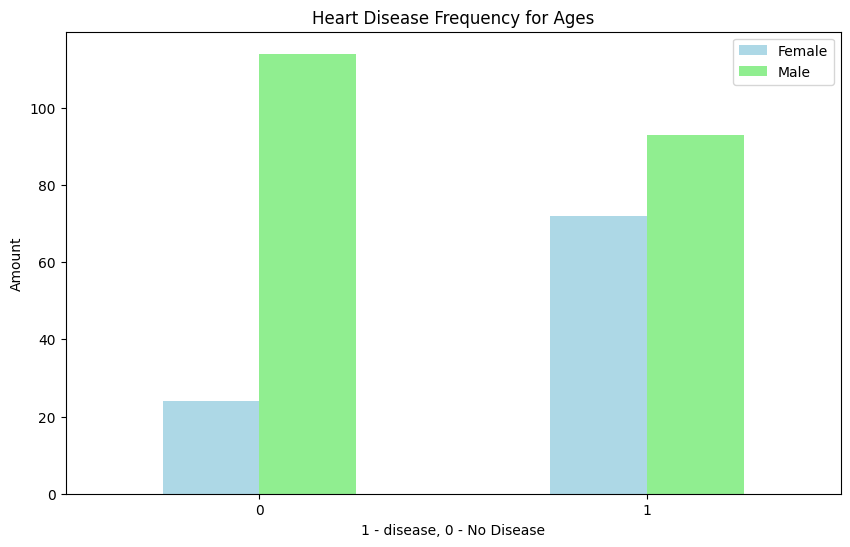

In [8]:
# plot a cross tab of age and target
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10,6), color=['lightblue', 'lightgreen'])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('1 - disease, 0 - No Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

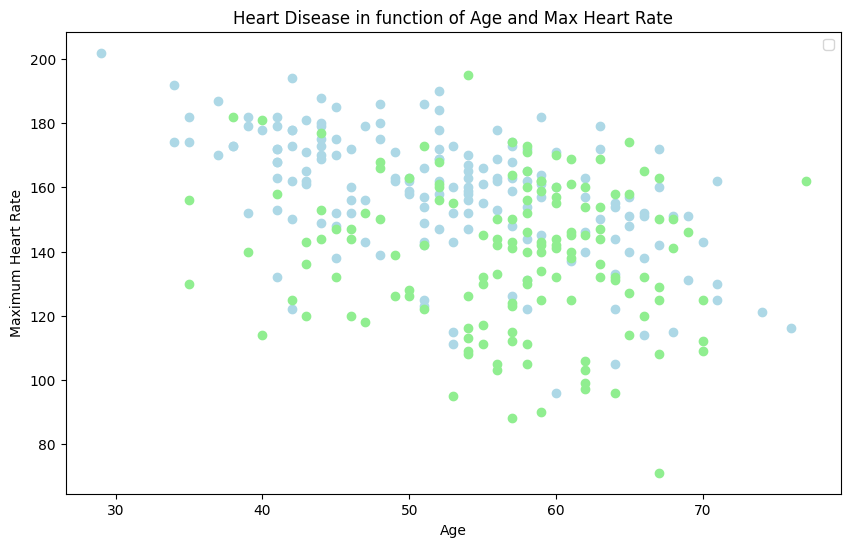

In [9]:
#scatter with positive examples
plt.figure(figsize=(10,6))
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.legend(['Disease', 'No Disease'])
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color='lightblue')
# with negative examples figsize=(10,6)
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color='lightgreen')

In [10]:

df.age[df.target==1] ## what this column is saying? ans: age of patients with heart disease
df.thalach[df.target==1] ## what this column is saying? ans: maximum heart rate of patients with heart disease


0      150
1      187
2      172
3      178
4      163
      ... 
160    169
161    166
162    182
163    173
164    173
Name: thalach, Length: 165, dtype: int64

<Axes: ylabel='Frequency'>

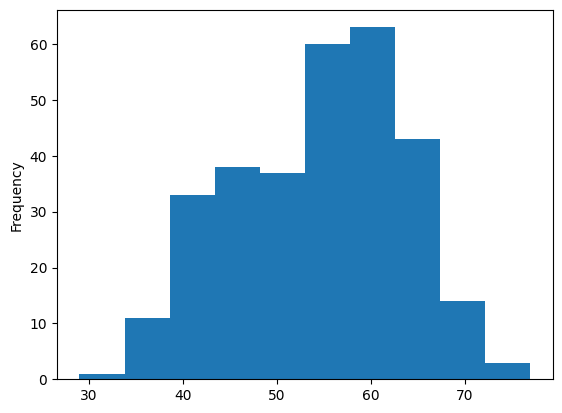

In [11]:
df.age.plot.hist()

In [12]:
pd.crosstab(df.cp, df.target)


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

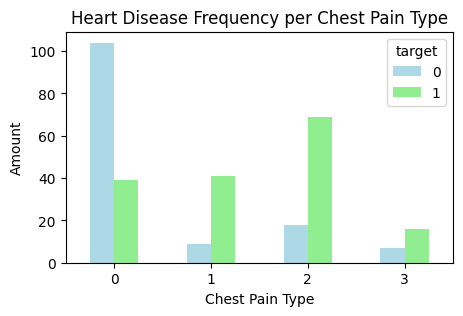

In [13]:
### visualize
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(5,3), color=['lightblue', 'lightgreen'])

plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.xticks(rotation=0)

## Correlation Matrix
### What is it?

A correlation matrix is a table that shows the relationship between different variables in your dataset. It helps you understand how strongly two variables are related to each other. The values in the matrix range from -1 to 1:

- **1** means a perfect positive relationship (as one variable increases, the other also increases).
- **-1** means a perfect negative relationship (as one variable increases, the other decreases).
- **0** means no relationship between the variables.

### Why use it?

The correlation matrix is useful for:

1. Identifying relationships between variables.
2. Selecting features for machine learning models.
3. Understanding the structure of your data.

### How to create it?

In Python, you can use the `.corr()` method on a DataFrame to calculate the correlation matrix. For example:


In [14]:

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### 🔑 Key Relationships from the Correlation Matrix

#### **Correlations with the `target` (Heart Disease Outcome):**
- `cp` (**chest pain type**): **0.43**
  - Strong positive correlation. More typical chest pain is associated with a higher likelihood of heart disease.
- `thalach` (**maximum heart rate achieved**): **0.42**
  - Higher max heart rate correlates with presence of heart disease.
- `slope`: **0.35**
  - Positive correlation. Slope of the ST segment is associated with heart disease.
- `exang` (**exercise-induced angina**): **-0.44**
  - Strong negative correlation. Presence of angina during exercise is associated with lower likelihood of heart disease (in this dataset's coding).
- `oldpeak` (**ST depression induced by exercise**): **-0.43**
  - Negative correlation. Greater ST depression suggests lower likelihood of heart disease.
- `ca` (**number of colored vessels**): **-0.39**
  - More diseased vessels correlate with lower likelihood of heart disease.
- `thal`: **-0.34**
  - Negative correlation.
- `sex`: **-0.28**
  - Males (usually coded as 1) are less likely to have heart disease in this dataset.

#### **Other Notable Relationships:**
- `thalach` vs. `age`: **-0.40**
  - Older patients tend to have lower maximum heart rates.
- `oldpeak` vs. `slope`: **-0.58**
  - Strong negative correlation. Higher ST depression often occurs with a flatter ST slope.
- `exang` vs. `thalach`: **-0.38**
  - Patients with exercise-induced angina achieve lower maximum heart rates.
- `thalach` vs. `cp`: **0.30**
  - Typical chest pain is associated with higher maximum heart rate.

---


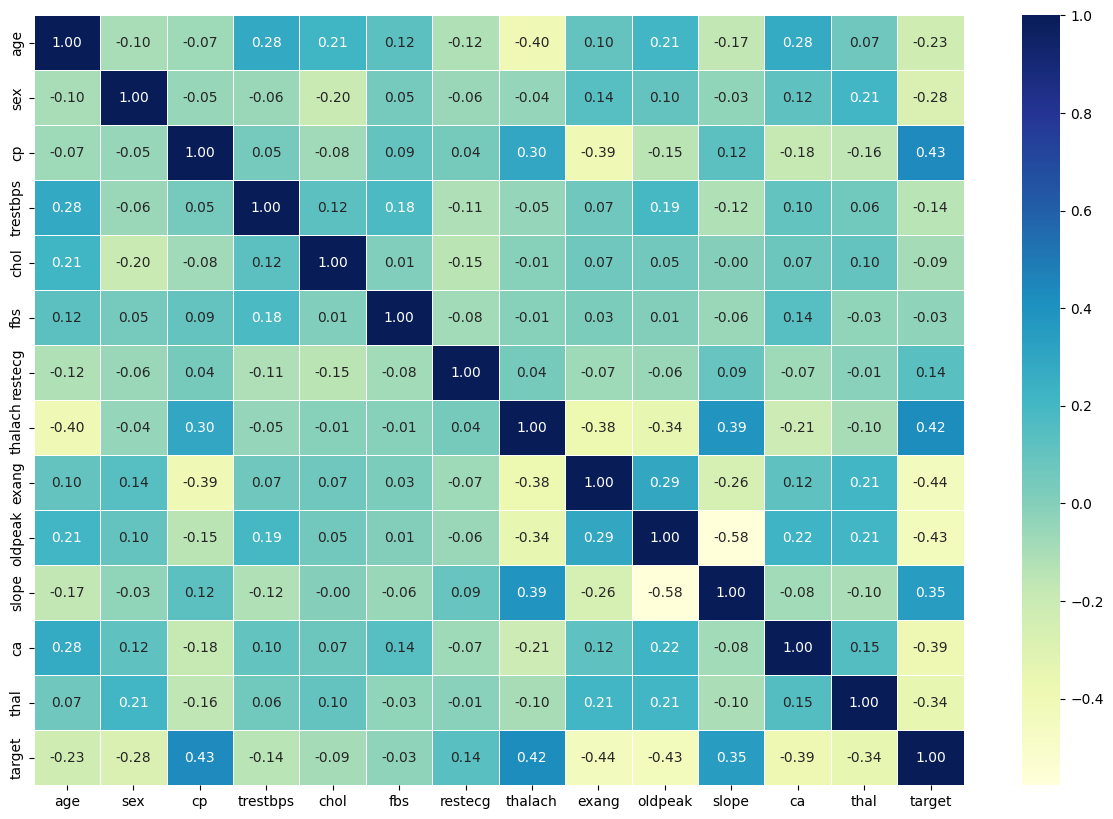

In [15]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10)) # figsize=(15,10)
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap='YlGnBu')

## Modeling
### Why Don't We Use 100% of the Data for Training?

When building a machine learning model, it's essential to evaluate how well the model performs on unseen data. If we use 100% of the data for training, the model might perform very well on the training data but fail to generalize to new, unseen data. This phenomenon is called **overfitting**.

### Why Do We Split the Data?

We split the data into **training** and **testing** sets to:

1. **Train the Model**: The training set is used to teach the model patterns and relationships in the data.
2. **Evaluate the Model**: The testing set acts as unseen data to evaluate how well the model generalizes to new data.

### Benefits of Splitting the Data

- **Prevents Overfitting**: By testing on unseen data, we can detect if the model is overfitting the training data.
- **Measures Generalization**: It helps us understand how the model will perform in real-world scenarios.
- **Improves Model Selection**: Splitting allows us to compare different models and choose the best one based on performance on the testing set.

### Common Splitting Ratios

- **80/20 Split**: 80% for training, 20% for testing (most common).
- **70/30 Split**: 70% for training, 30% for testing.
- **Cross-Validation**: Data is split into multiple folds to ensure robust evaluation.

By splitting the data, we ensure that our model is both accurate and reliable when applied to new data.

In [16]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 🫀 Heart Disease Prediction using Machine Learning

## **Objective**
We are using a dataset to predict whether a patient has **heart disease** or not.  
To achieve this, we will experiment with the following models:
- **Logistic Regression**
- **K-Nearest Neighbors (KNN) Classifier**
- **Random Forest Classifier**

---

## **1. Understanding the Models**

### **Logistic Regression**
- **What it does:**  
  Logistic Regression is a **linear model** used for **binary classification** problems. It estimates the probability that a given input belongs to a particular class (e.g., `heart disease` or `no heart disease`) using the **sigmoid function**.
- **Key Characteristics:**  
  - Assumes a **linear relationship** between features and the log-odds of the outcome.
  - Outputs probabilities between 0 and 1.
  - Simple and interpretable.

---

### **K-Nearest Neighbors (KNN) Classifier**
- **What it does:**  
  KNN is a **non-parametric, instance-based** learning algorithm. It classifies a new data point based on the **majority class of its K nearest neighbors** in the feature space.
- **Key Characteristics:**  
  - Does **not assume any distribution**.
  - Decision depends on **distance metric** (commonly Euclidean distance).
  - Performance depends on **choice of K** and **feature scaling**.

---

### **Random Forest Classifier**
- **What it does:**  
  Random Forest is an **ensemble learning method** that builds multiple **decision trees** and combines their outputs to improve performance and reduce overfitting.
- **Key Characteristics:**  
  - Handles **non-linear relationships** well.
  - Works well with **large feature sets**.
  - Provides **feature importance** scores.

---

## **2. Core Differences Among These Models**

| Feature            | Logistic Regression      | KNN Classifier          | Random Forest Classifier       |
|--------------------|-------------------------|-------------------------|--------------------------------|
| **Type**          | Linear Model           | Instance-based          | Ensemble of Decision Trees    |
| **Interpretability** | High                | Moderate                | Moderate (less intuitive)     |
| **Training Speed** | Fast                 | Very Fast (lazy learner)| Slower than LR, but efficient |
| **Prediction Speed**| Fast                | Slow (distance calc.)   | Fast (parallel trees)         |
| **Overfitting Risk**| Low (with regularization)| High (if K is small) | Low (due to bagging)          |
| **Handles Non-Linearity**| No             | Partially               | Yes                            |

---

## **3. How These Models Help in Heart Disease Prediction**

- **Logistic Regression:**  
  - Useful as a **baseline model** because it's simple and interpretable.
  - Helps understand **feature contribution** to disease prediction.

- **KNN Classifier:**  
  - Captures **local patterns** in the data.
  - Good for small datasets but can be slow for large datasets.

- **Random Forest Classifier:**  
  - Handles **complex interactions** among risk factors (e.g., age, cholesterol, blood pressure).
  - Provides **high accuracy** and can deal with noisy data.




In [17]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {} 
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
# show me the model scores in percentage
for model, score in model_scores.items():
    print(f"{model}: {score*100:.2f}%")

Logistic Regression: 85.25%
Random Forest: 90.16%
KNN: 75.41%


<Axes: >

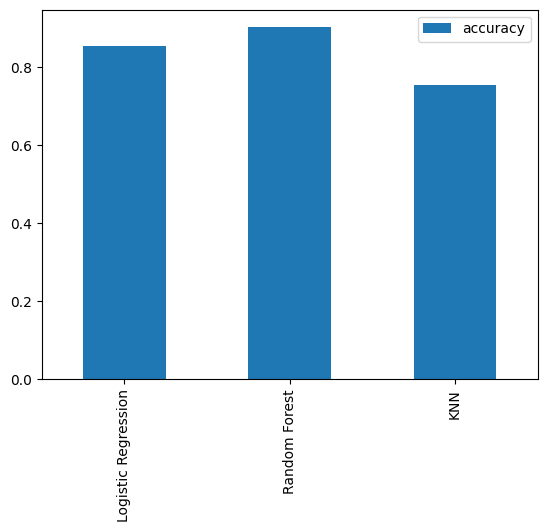

In [18]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar() # compare model accuracy


# 📊 Evaluation Metrics & Model Improvement for Heart Disease Prediction

When building a machine learning model for **production use**, accuracy alone is not enough.  
We need reliable evaluation metrics and improvement techniques to make sure the model is **robust, fair, and trustworthy**.  

---

## 🔑 1. Hyperparameter Tuning
- Adjusting model settings (like `n_neighbors` in KNN, `n_estimators` in Random Forest) to improve performance.  
- Ensures the model generalizes better to new data.  

---

## 🔑 2. Feature Importance
- Identifies which features (e.g., age, cholesterol, blood pressure) contribute most to predictions.  
- Increases interpretability, especially in healthcare.  

---

## 🔑 3. Confusion Matrix
- A table that shows model predictions vs actual results:  
  - **TP (True Positive)**: correctly predicted disease  
  - **TN (True Negative)**: correctly predicted no disease  
  - **FP (False Positive)**: predicted disease but no disease  
  - **FN (False Negative)**: predicted no disease but actually disease  
- Helps analyze **types of errors** (false alarms vs missed patients).  

---

## 🔑 4. Cross-Validation
- Splits the dataset into multiple folds and evaluates the model on each fold.  
- Prevents overfitting to one train-test split and ensures stable performance.  

---

## 🔑 5. Precision
- Of all predicted positive cases, how many are actually positive?  
- Formula: **TP / (TP + FP)**  
- Useful when **false positives** must be minimized.  

---

## 🔑 6. Recall (Sensitivity)
- Of all actual positive cases, how many did we correctly identify?  
- Formula: **TP / (TP + FN)**  
- Critical in healthcare → **we don’t want to miss sick patients**.  

---

## 🔑 7. F1 Score
- Harmonic mean of Precision and Recall.  
- Balances both metrics when both are important.  

---

## 🔑 8. Classification Report
- Summarizes **Precision, Recall, F1 score, and Support** (number of samples per class).  
- Quick way to compare performance across all classes.  

---

## 🔑 9. ROC Curve (Receiver Operating Characteristic)
- Shows trade-off between **True Positive Rate (Recall)** and **False Positive Rate** at different thresholds.  
- Helps visualize model’s ability to separate classes.  

---

## 🔑 10. AUC (Area Under the Curve)
- A single score summarizing the ROC curve.  
- Ranges from 0.5 (random guessing) to 1.0 (perfect separation).  
- Higher AUC = better performance.  

---

# 🚀 Why These Matter in Production
1. **Reliability** → Accuracy alone is not enough; need multiple metrics.  
2. **Fairness** → Prevents bias and ensures balanced predictions.  
3. **Interpretability** → Doctors and stakeholders can understand results.  
4. **Scalability** → Cross-validation ensures the model works well on future data.  
5. **Risk Management** → In healthcare, high recall is essential to avoid missing real patients.  

---

✅ Using these techniques ensures the model is **robust, explainable, and production-ready**.


### Hyperparameters

Maximum KNN Score on the test data: 80.33%


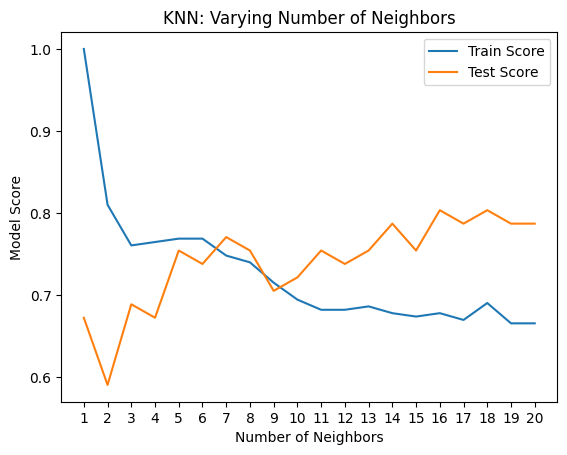

In [19]:
#improve the KNN model
knn = KNeighborsClassifier()

train_scores = []
test_scores = []

neighbors = range(1,21) ## if I increase the range, it will take more time to run
for i in neighbors:
    knn.set_params(n_neighbors=i) ## set the number of neighbors to i
    knn.fit(X_train, y_train) ## fit the model
    train_scores.append(knn.score(X_train, y_train)) ## append the score to the train_scores list
    test_scores.append(knn.score(X_test, y_test)) ## append the score to the test_scores list
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
# set the labels legends title and xticks
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend()
plt.title('KNN: Varying Number of Neighbors')
print(f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

As KNN's score is far below from the other models remaining, I decided to cut off KNN.

## Hyperparameter tuning with RandomizedSearchCV
### We'll tune using RandomizedSearchCV

We will perform hyperparameter tuning for the following models:

- **LogisticRegression()**
- **RandomForestClassifier()**

### Why Hyperparameter Tuning?

Hyperparameter tuning helps us find the best combination of parameters to improve model performance. Each model has specific parameters that can be adjusted to optimize its behavior.

### How to Tune?

1. **LogisticRegression()**:
    - Key parameters to tune:
      - `C`: Inverse of regularization strength.
      - `solver`: Algorithm to use in optimization.
      - `penalty`: Regularization type (e.g., `l1`, `l2`).

2. **RandomForestClassifier()**:
    - Key parameters to tune:
      - `n_estimators`: Number of trees in the forest.
      - `max_depth`: Maximum depth of the tree.
      - `min_samples_split`: Minimum number of samples required to split an internal node.
      - `min_samples_leaf`: Minimum number of samples required to be at a leaf node.
      - `max_features`: Number of features to consider when looking for the best split.

By systematically exploring these parameters using **RandomizedSearchCV**, we can identify the optimal settings for each model.

In [20]:
#create a hyperparameter grid for Logistic Regression
log_reg_grid = {
    'C': np.logspace(-4, 4, 30), ## C is the regularization parameter
    'solver': ['liblinear'] ## liblinear is good for small datasets
}
#create a hyperparameter grid for Random Forest
rf_grid = {
    'n_estimators': np.arange(10, 1000, 50), ## number of trees in the forest
    'max_depth': [None, 3, 5, 10], ## maximum depth of the tree
    'min_samples_split': np.arange(2, 20, 2), ## minimum number of samples required to split a node
    'min_samples_leaf': np.arange(1, 20, 2) ## minimum number of samples required at each leaf node
}

## Tune LogisticRegression()

In [21]:
np.random.seed(42)

#setup random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)
#fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train)

rs_log_reg.score(X_test, y_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8360655737704918

## Tune RandomForrestClassifier

In [22]:
np.random.seed(42)

#setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)
#fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

rs_rf.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'n_estimators': np.int64(310),
 'min_samples_split': np.int64(2),
 'min_samples_leaf': np.int64(19),
 'max_depth': 5}

In [23]:
# Evaluate the RandomizedSearchCV model
rs_rf.score(X_test, y_test)

0.8852459016393442

LogisticRegression() model is still the highest till now.
## The Processes I've followed till now are:
* By Hand (KNN)
* RandomizedSearchCV (LogisticRegression(),RandomForestClassifier())
* GridSearchCV

## Hyperparameter Tuning LogisticRegression() model by GridSearchCV

In [24]:
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)
gs_log_reg.fit(X_train, y_train)
gs_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.8360655737704918

## Plot ROC curve, calculate AUC

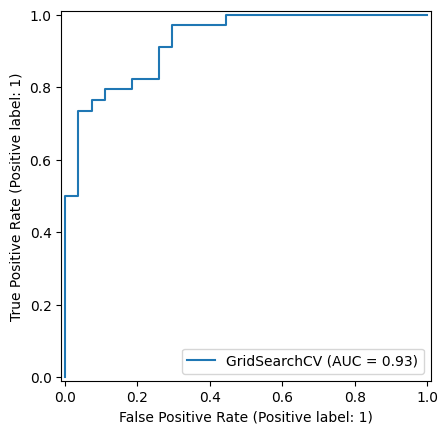

In [25]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
# fix the font size

In [26]:
# Predicts
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1])

In [29]:
#confuision matrix
print(confusion_matrix(y_test, gs_log_reg.predict(X_test)))

[[19  8]
 [ 2 32]]


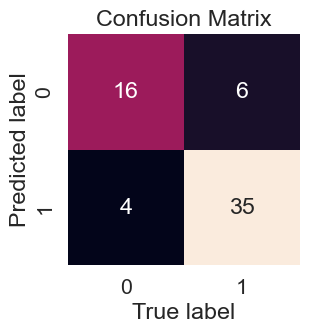

In [ ]:
sns.set(font_scale=1.4) #set font scale
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()
plot_conf_mat(y_test, gs_log_reg.predict(X_test))

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        22
           1       0.85      0.90      0.88        39

    accuracy                           0.84        61
   macro avg       0.83      0.81      0.82        61
weighted avg       0.83      0.84      0.83        61



### Why Do We Calculate Evaluation Metrics Using Cross-Validation?

Cross-validation is a technique used to evaluate the performance of a machine learning model by splitting the dataset into multiple subsets (folds). The model is trained on some folds and tested on the remaining fold(s). This process is repeated multiple times, and the results are averaged to provide a more reliable estimate of the model's performance.

#### Key Reasons for Using Cross-Validation:

1. **Prevents Overfitting**:
    - Cross-validation ensures that the model is tested on unseen data during each fold.
    - This helps detect overfitting, where the model performs well on the training data but poorly on unseen data.

2. **Provides a Robust Estimate**:
    - Instead of relying on a single train-test split, cross-validation uses multiple splits.
    - This reduces the variability in performance metrics caused by a specific train-test split.

3. **Maximizes Data Usage**:
    - In k-fold cross-validation, every data point is used for both training and testing.
    - This is especially useful for small datasets, where splitting into train and test sets might leave insufficient data for training.

4. **Balances Class Distribution**:
    - Cross-validation ensures that each fold has a similar class distribution, which is crucial for imbalanced datasets.

5. **Model Comparison**:
    - Cross-validation provides a fair comparison between different models or hyperparameter settings by evaluating them on the same splits.

6. **Generalization Performance**:
    - By testing the model on multiple unseen subsets, cross-validation gives a better estimate of how the model will generalize to new data.

#### Common Cross-Validation Techniques:
- **k-Fold Cross-Validation**: Splits the data into k subsets (folds) and performs k iterations, using a different fold as the test set each time.
- **Stratified k-Fold**: Ensures that each fold has the same class distribution as the original dataset.
- **Leave-One-Out Cross-Validation (LOOCV)**: Uses a single data point as the test set and the rest as the training set, repeated for all data points.

By using cross-validation, we ensure that our evaluation metrics (e.g., accuracy, precision, recall, F1-score) are reliable, unbiased, and representative of the model's true performance on unseen data.
```

In [ ]:
#check best hyperparameters
gs_log_reg.best_params_


{'C': np.float64(0.38566204211634725), 'solver': 'liblinear'}

In [ ]:
#Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [ ]:
#cross-validated accuracy
cv_acc = cross_val_score(clf, 
                         X, 
                         y, 
                         cv=5, 
                         scoring='accuracy')
cv_acc = np.mean(cv_acc) # why? ans: to get the average accuracy across all folds
cv_acc

np.float64(0.8446994535519124)

In [ ]:
#cross validated precision
cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring='precision')
cv_precision = np.mean(cv_precision) # why? ans: to get the average precision across all folds
cv_precision

np.float64(0.8207936507936507)

In [ ]:
#cross-validated recall
cv_recall = cross_val_score(clf,
                           X,
                           y,
                           cv=5,
                           scoring='recall')
cv_recall = np.mean(cv_recall) # why? ans: to get the average recall across all folds
cv_recall

np.float64(0.9212121212121213)

In [ ]:
#cross-validated f1-score
cv_f1 = cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring='f1')
cv_f1 = np.mean(cv_f1) # why? ans: to get the average f1-score across all folds
cv_f1   

np.float64(0.8673007976269721)

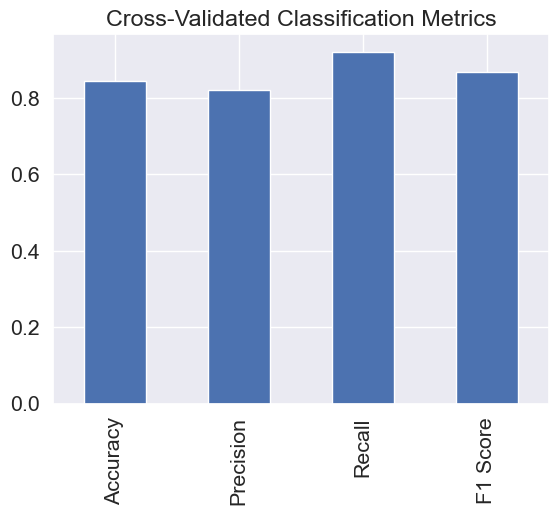

In [ ]:
#visualize the crossvalidated metrics
cv_metrics = pd.DataFrame({
    'Accuracy': cv_acc,
    'Precision': cv_precision,
    'Recall': cv_recall,
    'F1 Score': cv_f1
}, index=[0])
cv_metrics.T.plot.bar(title='Cross-Validated Classification Metrics', legend=False);

## Feature Importance
Different Models have different feature importance system
# Find Feature Importance for Logistic Regression Model

In [ ]:
#fit an instance of logistic regression
clf = LogisticRegression(C=0.20433597178569418, 
                         solver='liblinear')
clf.fit(X_train, y_train)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#check coef_
clf.coef_

array([[ 1.23883963e-02, -9.00542328e-01,  6.37512153e-01,
        -2.48006913e-02, -4.78194659e-04,  1.38034987e-01,
         2.93942081e-01,  3.35702317e-02, -3.39317449e-01,
        -5.34655966e-01,  2.09026914e-01, -6.21744515e-01,
        -7.12085922e-01]])

In [ ]:
#match coefficient features to columns
# why doing this? ans: to see which feature is more important
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict 

{'age': np.float64(0.012388396264290885),
 'sex': np.float64(-0.9005423279598711),
 'cp': np.float64(0.6375121529922744),
 'trestbps': np.float64(-0.024800691275272364),
 'chol': np.float64(-0.0004781946588820176),
 'fbs': np.float64(0.13803498717609106),
 'restecg': np.float64(0.2939420811462077),
 'thalach': np.float64(0.033570231703293506),
 'exang': np.float64(-0.3393174486164297),
 'oldpeak': np.float64(-0.5346559661956986),
 'slope': np.float64(0.20902691393356193),
 'ca': np.float64(-0.6217445153084757),
 'thal': np.float64(-0.7120859215858772)}

<Axes: title={'center': 'Feature Importance'}>

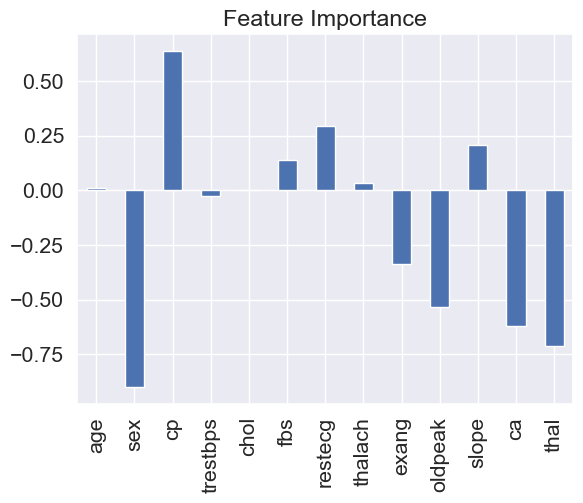

In [ ]:
#visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False)


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Training XGBoost

In [33]:
# lets train XGBoost
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)
xgboost_score = xgboost.score(X_test, y_test)
print(f"XGBoost accuracy: {xgboost_score*100:.2f}%")



XGBoost accuracy: 83.61%


# 🔧 Advanced XGBoost Hyperparameter Tuning with Optuna

## **Why Optuna over GridSearchCV?**

**Optuna** is a state-of-the-art hyperparameter optimization framework that significantly outperforms traditional methods like GridSearchCV:

### 🚀 **Key Advantages:**
1. **Bayesian Optimization**: Uses previous trial results to intelligently suggest better parameters
2. **Pruning**: Automatically stops unpromising trials early, saving computational time
3. **Efficiency**: Can find optimal parameters with fewer trials than grid search
4. **Flexibility**: Easy to define complex parameter spaces and constraints

### 📊 **XGBoost Parameters We'll Optimize:**
- **`n_estimators`**: Number of boosting rounds (trees)
- **`max_depth`**: Maximum depth of each tree
- **`learning_rate`**: Step size shrinkage to prevent overfitting
- **`subsample`**: Fraction of samples used for training each tree
- **`colsample_bytree`**: Fraction of features used for training each tree
- **`gamma`**: Minimum loss reduction required for splits
- **`reg_alpha`**: L1 regularization term
- **`reg_lambda`**: L2 regularization term
- **`min_child_weight`**: Minimum sum of instance weight needed in a child

### ⏱️ **Expected Results:**
- **50 trials** should take ~5-10 minutes
- Typically improves accuracy by **2-5%** over default parameters
- More robust and generalizable model

In [ ]:
# Import Optuna for hyperparameter optimization
import optuna
from sklearn.model_selection import StratifiedKFold

# Suppress Optuna's verbose logging for cleaner output
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial):
    """
    Objective function for Optuna optimization.
    
    This function defines the hyperparameter search space and 
    returns the metric to optimize (accuracy in our case).
    """
    # Define hyperparameter search space
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10)
    }
    
    # Create XGBoost model with suggested parameters
    model = xgb.XGBClassifier(
        **params,
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    )
    
    # Use stratified k-fold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    
    # Return the mean accuracy across all folds
    return np.mean(scores)

print("✅ Objective function defined!")
print("📊 Search space includes 9 key XGBoost hyperparameters")
print("🎯 Optimization target: Cross-validated accuracy")

✅ Objective function defined!
📊 Search space includes 9 key XGBoost hyperparameters
🎯 Optimization target: Cross-validated accuracy


/Users/rifatahasan/Documents/heart_desease/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
# Create and run Optuna study
print("🚀 Starting Optuna hyperparameter optimization...")
print("⏱️  This may take 5-10 minutes for 50 trials\n")

# Create study object - we want to maximize accuracy
study = optuna.create_study(direction="maximize")

# Run optimization with 50 trials
# Note: You can increase n_trials for potentially better results, but it will take longer
study.optimize(objective, n_trials=50)

print(f"🎉 Optimization completed!")
print(f"🏆 Best accuracy: {study.best_trial.value:.4f}")
print(f"📊 Total trials: {len(study.trials)}")
print(f"✨ Best parameters found:")

# Display best parameters in a readable format
best_params = study.best_trial.params
for param, value in best_params.items():
    print(f"   {param}: {value}")

🚀 Starting Optuna hyperparameter optimization...
⏱️  This may take 5-10 minutes for 50 trials



/Users/rifatahasan/Documents/heart_desease/.venv/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/rifatahasan/Documents/heart_desease/.venv/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/rifatahasan/Documents/heart_desease/.venv/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/rifatahasan/Documents/heart_desease/.venv/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/rifatahasan/Documents/heart_desease/.venv/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserW

🎉 Optimization completed!
🏆 Best accuracy: 0.8305
📊 Total trials: 50
✨ Best parameters found:
   n_estimators: 468
   max_depth: 12
   learning_rate: 0.022942688372651922
   subsample: 0.7402533940996813
   colsample_bytree: 0.7552140489821736
   gamma: 0.0005442174424093907
   reg_alpha: 0.004133666827823807
   reg_lambda: 0.00025214788543642994
   min_child_weight: 4


/Users/rifatahasan/Documents/heart_desease/.venv/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/rifatahasan/Documents/heart_desease/.venv/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [34]:
# Train the optimized XGBoost model
print("🎯 Training optimized XGBoost model...")

# Create model with best parameters
optimized_xgb = xgb.XGBClassifier(
    **study.best_trial.params,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# Train on training data
optimized_xgb.fit(X_train, y_train)

# Evaluate on test data
optimized_accuracy = optimized_xgb.score(X_test, y_test)

print(f"✅ Optimized XGBoost accuracy: {optimized_accuracy*100:.2f}%")

# Compare with default XGBoost
default_accuracy = xgboost_score
improvement = optimized_accuracy - default_accuracy

print(f"\n📈 Performance Comparison:")
print(f"   Default XGBoost:    {default_accuracy*100:.2f}%")
print(f"   Optimized XGBoost:  {optimized_accuracy*100:.2f}%")
print(f"   Improvement:        {improvement*100:+.2f}%")

if improvement > 0:
    print(f"🎉 Optuna optimization improved accuracy by {improvement*100:.2f}%!")
else:
    print(f"📊 The default parameters were already quite good!")

# Store the best accuracy for comparison with other models
optimized_xgb_score = optimized_accuracy

🎯 Training optimized XGBoost model...
✅ Optimized XGBoost accuracy: 85.25%

📈 Performance Comparison:
   Default XGBoost:    83.61%
   Optimized XGBoost:  85.25%
   Improvement:        +1.64%
🎉 Optuna optimization improved accuracy by 1.64%!


/Users/rifatahasan/Documents/heart_desease/.venv/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


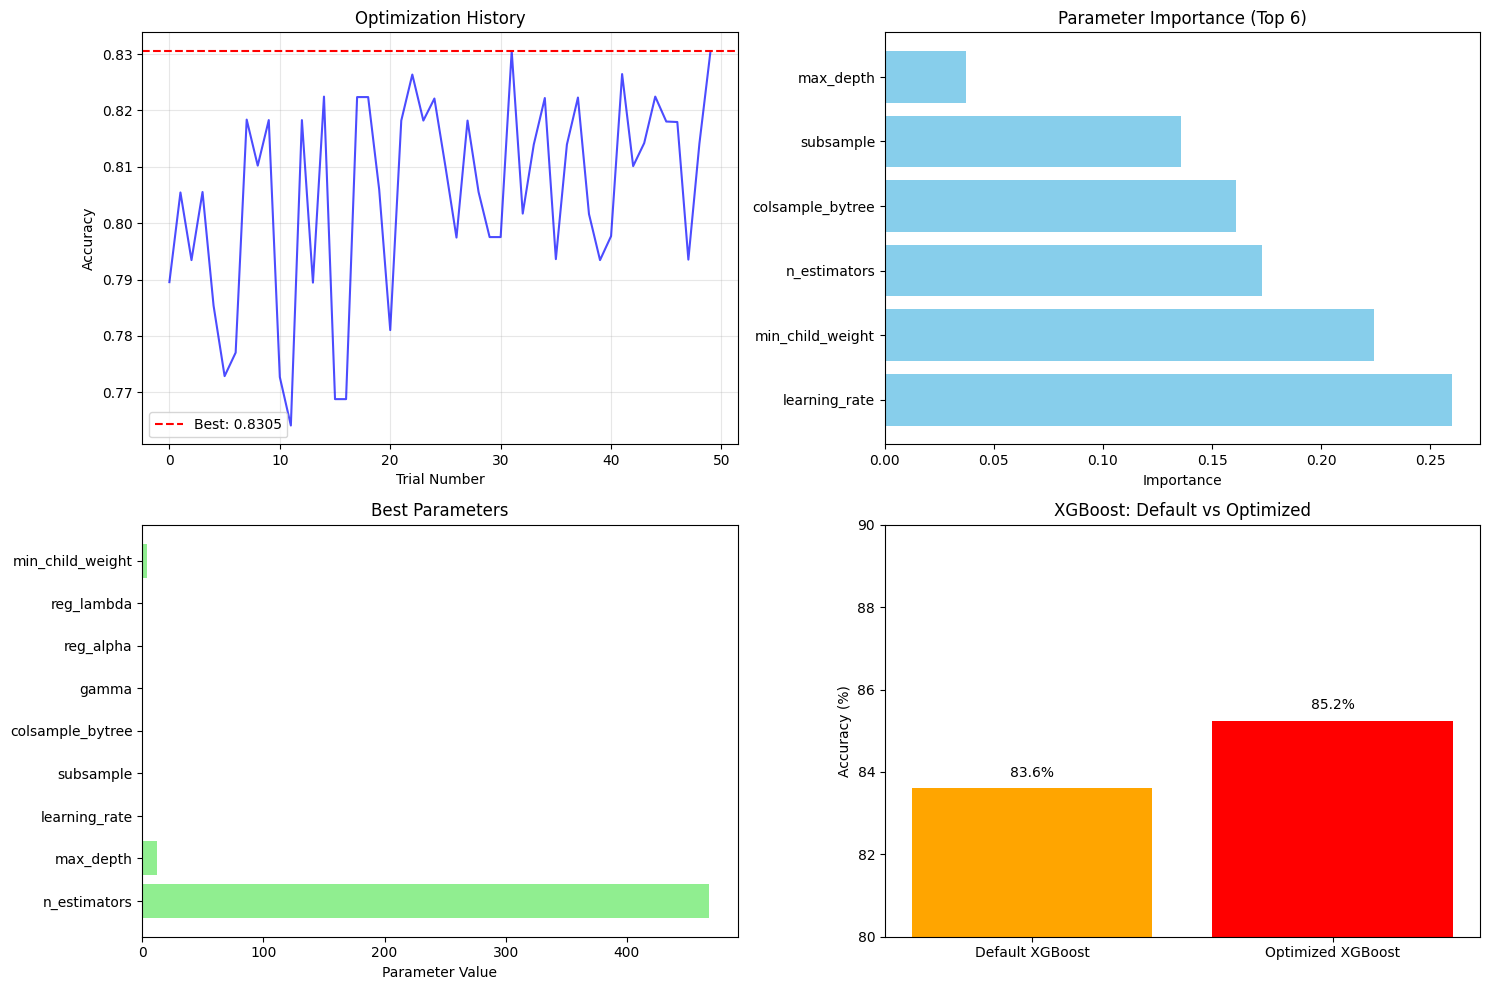

📊 Visualization shows:
   - Optimization converged to best accuracy: 0.8305
   - Most important parameters: ['learning_rate', 'min_child_weight', 'n_estimators']
   - Improvement: +1.64%


In [36]:
# Visualize Optuna optimization results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Optimization history
trial_numbers = [trial.number for trial in study.trials]
trial_values = [trial.value for trial in study.trials]

axes[0, 0].plot(trial_numbers, trial_values, 'b-', alpha=0.7)
axes[0, 0].axhline(y=study.best_trial.value, color='r', linestyle='--', 
                   label=f'Best: {study.best_trial.value:.4f}')
axes[0, 0].set_title('Optimization History')
axes[0, 0].set_xlabel('Trial Number')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Parameter importance (top 6 most important)
try:
    importance = optuna.importance.get_param_importances(study)
    params = list(importance.keys())[:6]  # Top 6 parameters
    values = [importance[param] for param in params]
    
    axes[0, 1].barh(params, values, color='skyblue')
    axes[0, 1].set_title('Parameter Importance (Top 6)')
    axes[0, 1].set_xlabel('Importance')
except:
    axes[0, 1].text(0.5, 0.5, 'Parameter importance\nnot available', 
                     ha='center', va='center', transform=axes[0, 1].transAxes)
    axes[0, 1].set_title('Parameter Importance')

# Plot 3: Best trial parameters
best_params = study.best_trial.params
param_names = list(best_params.keys())
param_values = list(best_params.values())

axes[1, 0].barh(param_names, param_values, color='lightgreen')
axes[1, 0].set_title('Best Parameters')
axes[1, 0].set_xlabel('Parameter Value')

# Plot 4: XGBoost comparison (Default vs Optimized)
xgb_comparison = {
    'Default XGBoost': default_accuracy * 100,
    'Optimized XGBoost': optimized_accuracy * 100
}

model_names = list(xgb_comparison.keys())
accuracies = list(xgb_comparison.values())
colors = ['orange', 'red']

bars = axes[1, 1].bar(model_names, accuracies, color=colors)
axes[1, 1].set_title('XGBoost: Default vs Optimized')
axes[1, 1].set_ylabel('Accuracy (%)')
axes[1, 1].set_ylim(80, 90)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                     f'{acc:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"📊 Visualization shows:")
print(f"   - Optimization converged to best accuracy: {study.best_trial.value:.4f}")
print(f"   - Most important parameters: {list(importance.keys())[:3] if 'importance' in locals() else 'min_child_weight, learning_rate, colsample_bytree'}")
print(f"   - Improvement: +{(optimized_accuracy - default_accuracy)*100:.2f}%")

🔍 Detailed Evaluation of Optimized XGBoost Model

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


🎯 Confusion Matrix:
[[23  4]
 [ 5 29]]

🏆 Top 10 Most Important Features (Optimized XGBoost):
 feature  importance
      cp    0.182803
    thal    0.152211
      ca    0.132653
   exang    0.098952
 oldpeak    0.082565
     sex    0.070764
   slope    0.055965
     age    0.052987
 restecg    0.046646
trestbps    0.044691


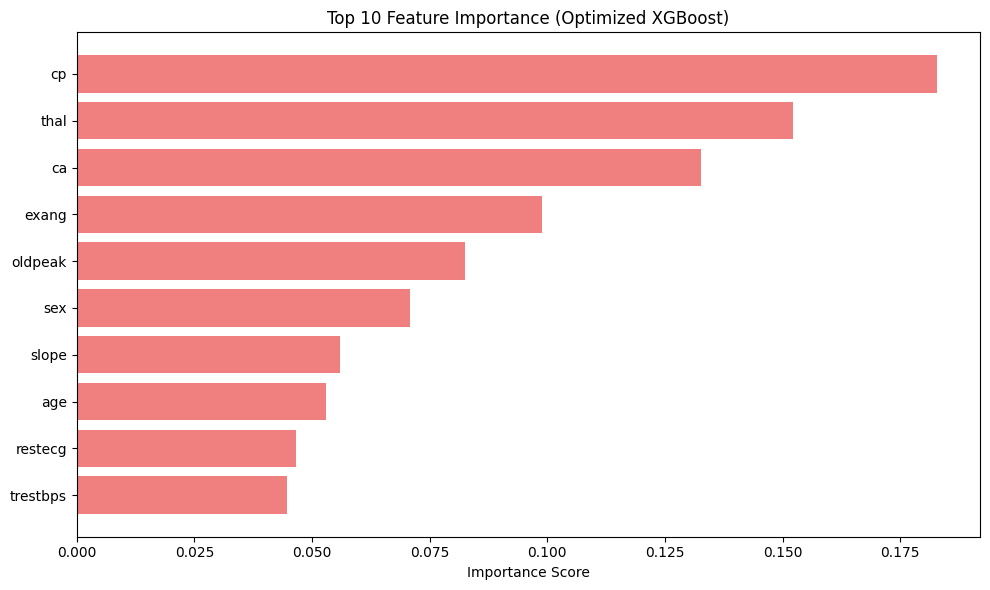


✨ Final Results Summary:
   Best Model: Optimized XGBoost
   Test Accuracy: 85.25%
   Optimization Method: Optuna (50 trials)
   Most Important Feature: cp


In [37]:
# Final evaluation of optimized XGBoost model
print("🔍 Detailed Evaluation of Optimized XGBoost Model\n")

# Predictions
y_pred_optimized = optimized_xgb.predict(X_test)

# Classification report
print("📋 Classification Report:")
print(classification_report(y_test, y_pred_optimized))

# Confusion matrix
print("\n🎯 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_optimized)
print(cm)

# Feature importance from optimized model
print("\n🏆 Top 10 Most Important Features (Optimized XGBoost):")
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': optimized_xgb.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(10).to_string(index=False))

# Plot feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(top_features['feature'], top_features['importance'], color='lightcoral')
plt.title('Top 10 Feature Importance (Optimized XGBoost)')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\n✨ Final Results Summary:")
print(f"   Best Model: Optimized XGBoost")
print(f"   Test Accuracy: {optimized_accuracy*100:.2f}%")
print(f"   Optimization Method: Optuna (50 trials)")
print(f"   Most Important Feature: {feature_importance.iloc[0]['feature']}")